In [139]:
# Classify whether the cell samples are bening (mild state) or maligant (evil state)

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
data = pd.read_csv("cell_samples.csv")
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [142]:
data.describe

<bound method NDFrame.describe of           ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0    1000025      5         1          1        1            2       1   
1    1002945      5         4          4        5            7      10   
2    1015425      3         1          1        1            2       2   
3    1016277      6         8          8        1            3       4   
4    1017023      4         1          1        3            2       1   
..       ...    ...       ...        ...      ...          ...     ...   
694   776715      3         1          1        1            3       2   
695   841769      2         1          1        1            2       1   
696   888820      5        10         10        3            7       3   
697   897471      4         8          6        4            3       4   
698   897471      4         8          8        5            4       5   

     BlandChrom  NormNucl  Mit  Class  
0             3         1    1      2

In [143]:
data.shape

(699, 11)

In [144]:
data.size      # 699*11

7689

In [145]:
data.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [146]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [147]:
benign_df = data[data['Class']==2][0:200]
malignant_df = data[data['Class']==4][0:200]

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  AxesSubplot(fig, *args, **kwargs)
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __reduce__(self)
 |  
 |  set(self, *, adjustable=<UNSET>, agg_filter=<UNSET>, alpha=<UNSET>, anchor=<UNSET>, animated=<UNSET>, aspect=<UNSET>, autoscale_on=<UNSET>, autoscalex_on=<UNSET>, autoscaley_on=<UNSET>, axes_locator=<UNSET>, axisbelow=<UNSET>, box_aspect=<UNSET>, clip_box=<UNSET>, clip_on=<UNSET>, clip_path=<UNSET>, facecolor=<UNSET>, frame_on=<UNSET>, gid=<UNSET>, in_layout=<UNSET>, label=<UNSET>, mouseover=<UNSET>, navigate=<UNSET>, path_effects=<UNSET>, picker=<UNSET>, position=<UNSET>, prop_cycle=<UNSET>, rasterization_zorder=<UNSET>, rasterized=<UNSET>, sketch_params=<UNS

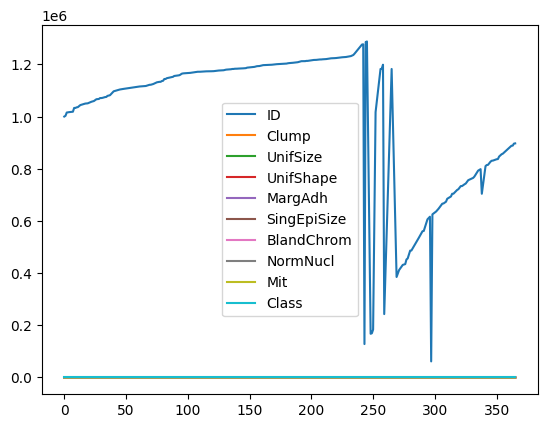

In [148]:
help(benign_df.plot())

<AxesSubplot: xlabel='Clump', ylabel='UnifSize'>

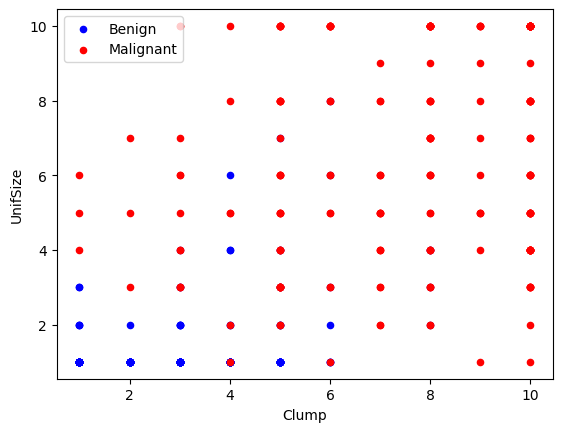

In [149]:
axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant', ax=axes)

In [150]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [151]:
data['BareNuc'] = pd.to_numeric(data['BareNuc'], errors='coerce')
data.dtypes

ID               int64
Clump            int64
UnifSize         int64
UnifShape        int64
MargAdh          int64
SingEpiSize      int64
BareNuc        float64
BlandChrom       int64
NormNucl         int64
Mit              int64
Class            int64
dtype: object

In [152]:
# Check for NaN and Inf values
mask = np.isinf(data['BareNuc']) | pd.isna(data['BareNuc'])

# Filter the DataFrame to exclude rows with NaN or Inf values
data = data[~mask]

In [153]:
data['BareNuc'] = data['BareNuc'].astype(int)
data.dtypes

C:\Users\visha\AppData\Local\Temp\ipykernel_16996\3192078254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BareNuc'] = data['BareNuc'].astype(int)


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [154]:
data.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [155]:
X = data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

In [156]:
y = data['Class']

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [158]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [159]:
y_predict = classifier.predict(X_test)

In [160]:
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [161]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [162]:
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.9635036496350365